# Titanic Dataset - Data Visualization

This project explores the Titanic dataset using data visualization techniques. The goal is to find patterns and insights related to survival, passenger demographics, and other factors.

---

### 📂 Dataset Used:
- Source: Kaggle Titanic Dataset
- File: `titanic.csv`



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline


df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## basic info

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## checking missing values 

In [19]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## data cleaning 

In [25]:
# Fill missing 'Age' with median (safe way)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode (safe way)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [31]:
# df.drop('Cabin', axis=1, inplace=True)


In [33]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


### DATA VISUALIZATION

#### SURVIVAL COUNT 

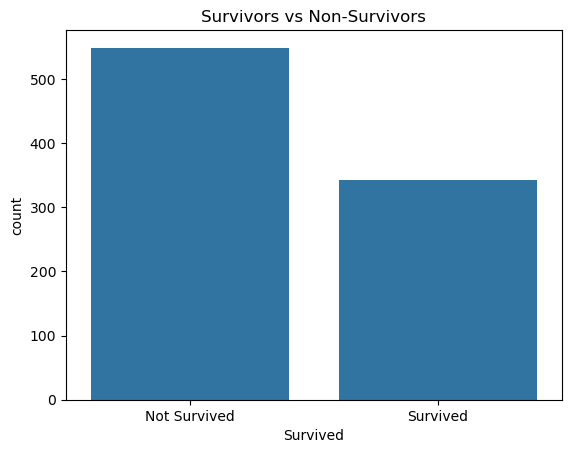

In [37]:
sns.countplot(x='Survived', data=df)
plt.title("Survivors vs Non-Survivors")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


#### SURVIVALBY GENDER 

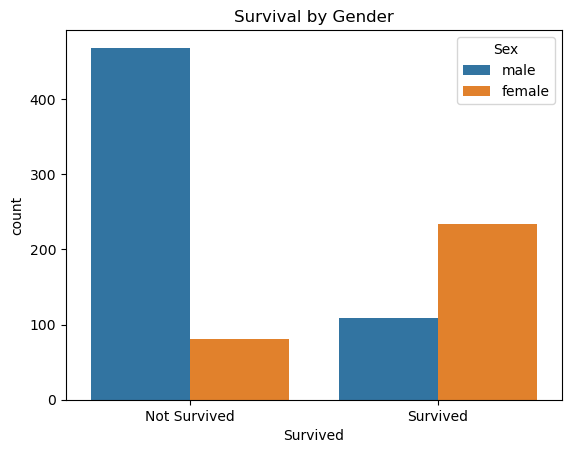

In [40]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


#### AGE DISTRIBUTION 

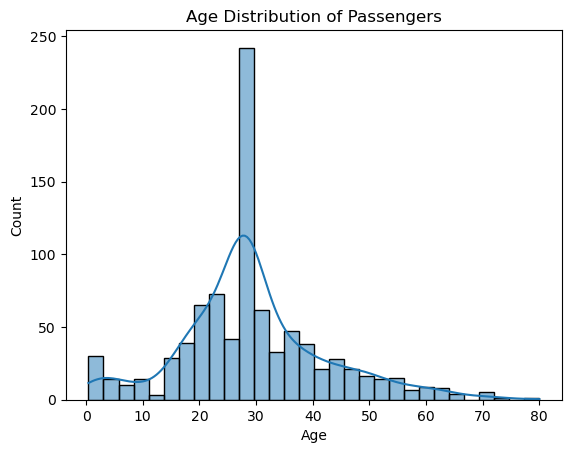

In [43]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


#### SURVIVAL BY PASSENGER CLASS 

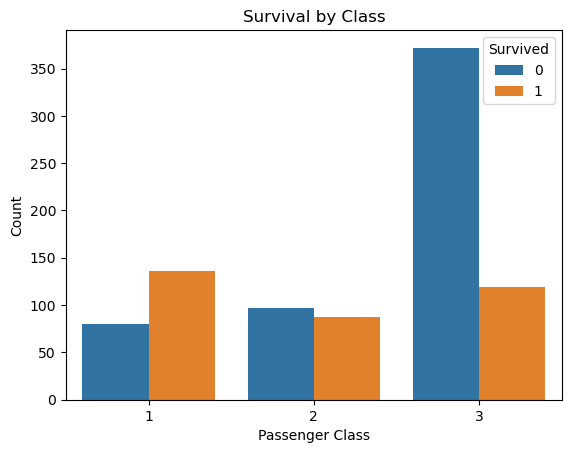

In [48]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


#### CORRELATION BY HEATMAP

<Figure size 1000x600 with 0 Axes>

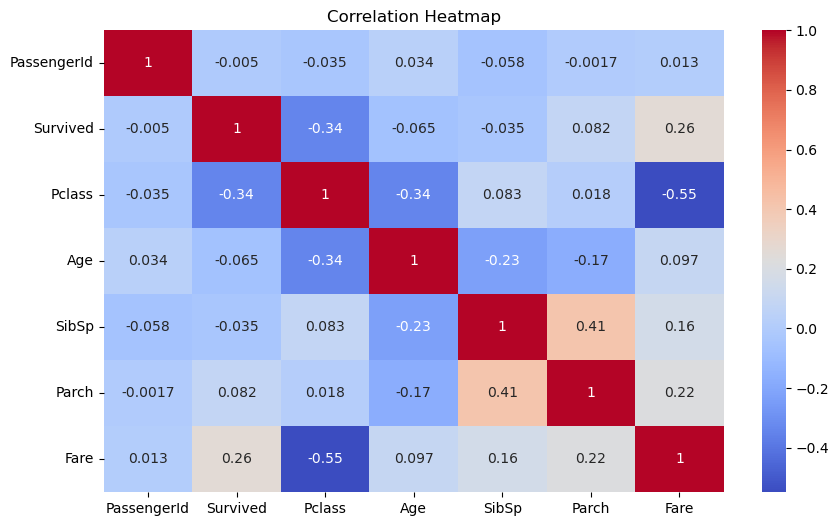

In [53]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## INSIGHTS AND CONCLUSION 

## 📌 Insights and Conclusion:

- **Gender**: More females survived than males.
- **Class**: First-class passengers had a higher survival rate.
- **Age**: Younger passengers (children) had better chances of survival.
- **Fare**: Higher fare-paying passengers had a better survival rate.
- **Embarked**: Most passengers boarded from port 'S'.

These insights show how passenger demographics and socio-economic factors influenced survival on the Titanic.
